## Heart attack prediction

In this project will be predict the chance of someone undergoes a heart attack

# 1 - Understand the problem

About this dataset



- Age : Age of the patient - Numeric variable

- Sex : Sex of the patient (1 = male ; 0 = female) - Categorical Variable




- exang: exercise induced angina (1 = yes; 0 = no) - Categorical Variable

- ca: number of major vessels (0-3) - Categorical Variable

- cp : Chest Pain type chest pain type - Categorical Variable

    Value 1: typical angina

    Value 2: atypical angina
    
    Value 3: non-anginal pain

    Value 4: asymptomatic
    



- trtbps : resting blood pressure (in mm Hg) - Numeric Variable

- chol : cholestoral in mg/dl fetched via BMI sensor - Numeric Variable

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) - Categorical Variable





- rest_ecg : resting electrocardiographic results - Categorical Variable

    Value 0: normal
    
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved






- target : 
    
    0= less chance of heart attack 
    
    1= more chance of heart attack


In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import sklearn as sk
import matplotlib as m
import imblearn as im
from imblearn.over_sampling import SMOTE
from statsmodels.tools import add_constant as add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')
%matplotlib inline

In [2]:
data = pd.read_csv("data/heart.csv")

In [3]:
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are some many features that are not well described in the dataset informations. I choose to remove from the initial model.

In [5]:
# Build the dataset

dataset = pd.DataFrame({'age': data['age'],
               'sex': data['sex'],
               'ex_angina': data['exng'],
               'ca': data['caa'],
               'cp': data['cp'],
               'trtbps': data['trtbps'],
               'chol': data['chol'],
               'fbs': data['fbs'],
               'rest_ecg': data['restecg'],
               'target': data['output']})

dataset.head()

,age,sex,ex_angina,ca,cp,trtbps,chol,fbs,rest_ecg,target
0,63,1,0,0,3,145,233,1,0,1
1,37,1,0,0,2,130,250,0,1,1
2,41,0,0,0,1,130,204,0,0,1
3,56,1,0,0,1,120,236,0,1,1
4,57,0,1,0,0,120,354,0,1,1


In [6]:
dataset.shape

(303, 10)

In [7]:
# Verify duplicated columns

dataset.duplicated().any()

True

In [8]:
# Remove Row duplicada

dataset = dataset.drop(dataset[dataset.duplicated()].index[0])

There may be duplicated columns and it is a problem to solve

In [9]:
# Verify missing values

dataset.isnull().any().sum()

0

In [10]:
dataset.isnull().sum()

age          0
sex          0
ex_angina    0
ca           0
cp           0
trtbps       0
chol         0
fbs          0
rest_ecg     0
target       0
dtype: int64

In [11]:
# Transform numeric in categorical type

categorical = ['sex',
              'ex_angina',
              'ca',
              'cp',
              'fbs',
              'rest_ecg',
              'target']

for item in categorical:
    dataset[item] = dataset[item].astype('category')

In [12]:
dataset.dtypes

age             int64
sex          category
ex_angina    category
ca           category
cp           category
trtbps          int64
chol            int64
fbs          category
rest_ecg     category
target       category
dtype: object

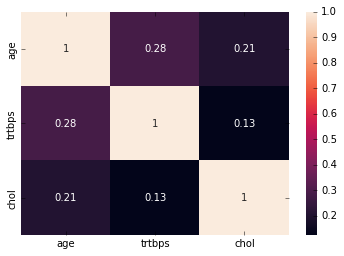

In [13]:
# Matrix de correlação

dataset_corr = dataset.corr()
sns.heatmap(dataset_corr, annot=True);

In [14]:
dataset.describe()

,age,trtbps,chol
count,302.00000,302.000000,302.000000
mean,54.42053,131.602649,246.500000
std,9.04797,17.563394,51.753489
min,29.00000,94.000000,126.000000
25%,48.00000,120.000000,211.000000
50%,55.50000,130.000000,240.500000
75%,61.00000,140.000000,274.750000
max,77.00000,200.000000,564.000000


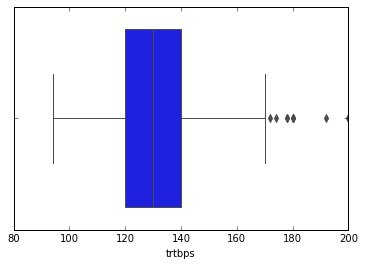

In [15]:
sns.boxplot(dataset.trtbps);

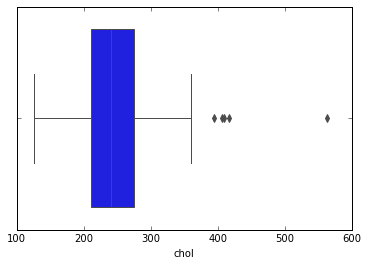

In [16]:
sns.boxplot(dataset.chol);

In [17]:
dataset.isnull().sum()

age          0
sex          0
ex_angina    0
ca           0
cp           0
trtbps       0
chol         0
fbs          0
rest_ecg     0
target       0
dtype: int64

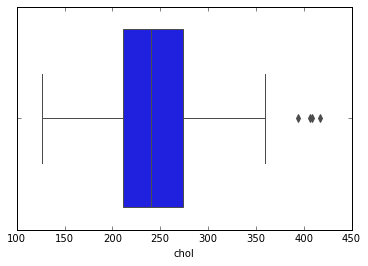

In [18]:
dataset = dataset.drop(dataset[dataset.chol > 500].index)
sns.boxplot(dataset.chol);

In [19]:
dataset.isnull().sum()

age          0
sex          0
ex_angina    0
ca           0
cp           0
trtbps       0
chol         0
fbs          0
rest_ecg     0
target       0
dtype: int64

In [20]:
# Calc associação

import scipy.stats as ss


def cramer_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    
    # Teste qui-quadrado de independencia entre duas variáveis categóricas
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [21]:
from pandas.api.types import is_categorical_dtype

categorical_vars = []

for column in dataset:
    if is_categorical_dtype(dataset[column]):
        categorical_vars.append(column)

categorical_vars

['sex', 'ex_angina', 'ca', 'cp', 'fbs', 'rest_ecg', 'target']

In [22]:
y = 'target'

print('A associação é um valor no intervalo de [0,1]. \n\n0 significa que nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('A associação entre a variável ', var, 'com a variável resposta é:', 
          cramer_v(dataset[var],dataset[y]))

A associação é um valor no intervalo de [0,1]. 

0 significa que nenhuma associação e 1 é associação completa.


A associação entre a variável  sex com a variável resposta é: 0.2676447964058
A associação entre a variável  ex_angina com a variável resposta é: 0.4241252041759629
A associação entre a variável  ca com a variável resposta é: 0.479802760990988
A associação entre a variável  cp com a variável resposta é: 0.5074854440958103
A associação entre a variável  fbs com a variável resposta é: 0.0
A associação entre a variável  rest_ecg com a variável resposta é: 0.16376306944564883
A associação entre a variável  target com a variável resposta é: 0.9932868744826066


In [23]:
# Calcula a proporção da variavel target

target_count = dataset.target.value_counts()

print("Classe 0 ", target_count[0])
print("Classe 1 ", target_count[1])

print("\nProporção:", round(target_count[0]/target_count[1], 2), " : 1")

Classe 0  163
Classe 1  138

Proporção: 1.18  : 1


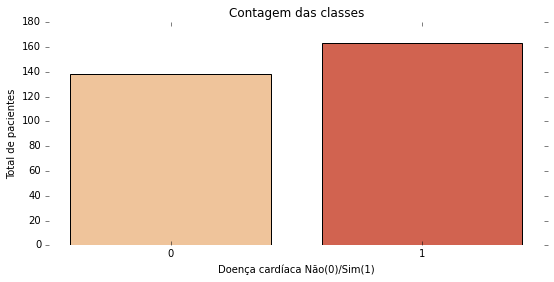

In [24]:
plt.figure(figsize=(9,4))
sns.countplot(dataset.target, palette='OrRd')
plt.box(on=None)
plt.xlabel('Doença cardíaca Não(0)/Sim(1)');
plt.ylabel('Total de pacientes');
plt.title('Contagem das classes');

In [25]:
dataset.head()

,age,sex,ex_angina,ca,cp,trtbps,chol,fbs,rest_ecg,target
0,63,1,0,0,3,145,233,1,0,1
1,37,1,0,0,2,130,250,0,1,1
2,41,0,0,0,1,130,204,0,0,1
3,56,1,0,0,1,120,236,0,1,1
4,57,0,1,0,0,120,354,0,1,1


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        301 non-null    int64   
 1   sex        301 non-null    category
 2   ex_angina  301 non-null    category
 3   ca         301 non-null    category
 4   cp         301 non-null    category
 5   trtbps     301 non-null    int64   
 6   chol       301 non-null    int64   
 7   fbs        301 non-null    category
 8   rest_ecg   301 non-null    category
 9   target     301 non-null    category
dtypes: category(7), int64(3)
memory usage: 20.6 KB


In [27]:
dataset['chol'] = dataset.chol.astype('int')

In [28]:
dataset.shape

(301, 10)

In [29]:
dataset.iloc[:,0:8]

,age,sex,ex_angina,ca,cp,trtbps,chol,fbs
0,63,1,0,0,3,145,233,1
1,37,1,0,0,2,130,250,0
2,41,0,0,0,1,130,204,0
3,56,1,0,0,1,120,236,0
4,57,0,1,0,0,120,354,0
...,...,...,...,...,...,...,...,...
298,57,0,1,0,0,140,241,0
299,45,1,0,0,3,110,264,0
300,68,1,0,2,0,144,193,1
301,57,1,1,1,0,130,131,0


In [30]:
dataset.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 301, dtype: category
Categories (2, int64): [0, 1]

In [31]:
# SMOTE

seed = 100

X = dataset.iloc[:,0:8]
y = dataset.iloc[:,-1]

X_res, y_res = SMOTE(random_state=seed).fit_resample(X,y)



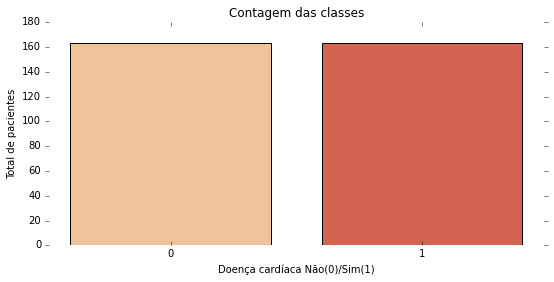

In [32]:
plt.figure(figsize=(9,4))
sns.countplot(y_res, palette='OrRd')
plt.box(on=None)
plt.xlabel('Doença cardíaca Não(0)/Sim(1)');
plt.ylabel('Total de pacientes');
plt.title('Contagem das classes');

In [33]:
X_res.shape

(326, 8)

In [34]:
y_res.shape

(326,)

In [35]:
X_final = add_constant(X_res)
X_final.head()

,const,age,sex,ex_angina,ca,cp,trtbps,chol,fbs
0,1.0,63,1,0,0,3,145,233,1
1,1.0,37,1,0,0,2,130,250,0
2,1.0,41,0,0,0,1,130,204,0
3,1.0,56,1,0,0,1,120,236,0
4,1.0,57,0,1,0,0,120,354,0


In [36]:
y_final = y_res
y_final.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [37]:
# Construção do modelo


X = X_final
y = y_final

logit_model_v1 = sm.Logit(y,X).fit()

print(logit_model_v1.summary())

Optimization terminated successfully.
         Current function value: 0.433734
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  326
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.3743
Time:                        14:03:15   Log-Likelihood:                -141.40
converged:                       True   LL-Null:                       -225.97
Covariance Type:            nonrobust   LLR p-value:                 1.956e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3191      1.619      4.519      0.000       4.145      10.493
age           -0.0312      0.

In [38]:
logit_model_v1.pred_table()

array([[129.,  34.],
       [ 30., 133.]])

In [39]:
predictions_v1 = logit_model_v1.predict()
print(predictions_v1[0:9])

[0.90121375 0.87053675 0.94872956 0.67686409 0.42788426 0.39354065
 0.85819499 0.72892934 0.76897745]


In [40]:
y_pred_v1 = [0 if x < 0.5 else 1 for x in predictions_v1]

In [41]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_v1))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       163
           1       0.80      0.82      0.81       163

    accuracy                           0.80       326
   macro avg       0.80      0.80      0.80       326
weighted avg       0.80      0.80      0.80       326



In [42]:
# Aplicando escala aos valores

scaler = MinMaxScaler(feature_range=(0,1))

X_final_scaled = pd.DataFrame(scaler.fit_transform(X_final.iloc[:,1:8]), columns=X_final.iloc[:,1:8].columns)

In [43]:
X_final_scaled.head()

,age,sex,ex_angina,ca,cp,trtbps,chol
0,0.708333,1.0,0.0,0.0,1.000000,0.481132,0.367698
1,0.166667,1.0,0.0,0.0,0.666667,0.339623,0.426117
2,0.250000,0.0,0.0,0.0,0.333333,0.339623,0.268041
3,0.562500,1.0,0.0,0.0,0.333333,0.245283,0.378007
4,0.583333,0.0,1.0,0.0,0.000000,0.245283,0.783505


In [44]:
X_final_scaled = add_constant(X_final_scaled)
X_final_scaled.head()

,const,age,sex,ex_angina,ca,cp,trtbps,chol
0,1.0,0.708333,1.0,0.0,0.0,1.000000,0.481132,0.367698
1,1.0,0.166667,1.0,0.0,0.0,0.666667,0.339623,0.426117
2,1.0,0.250000,0.0,0.0,0.0,0.333333,0.339623,0.268041
3,1.0,0.562500,1.0,0.0,0.0,0.333333,0.245283,0.378007
4,1.0,0.583333,0.0,1.0,0.0,0.000000,0.245283,0.783505


In [45]:
y_final.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [46]:
# Modelo V2

X = X_final_scaled
y = y_final

logit_model_v2 = sm.Logit(y,X).fit()

print(logit_model_v2.summary())

Optimization terminated successfully.
         Current function value: 0.435694
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  326
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.3714
Time:                        14:03:16   Log-Likelihood:                -142.04
converged:                       True   LL-Null:                       -225.97
Covariance Type:            nonrobust   LLR p-value:                 7.095e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5438      0.762      4.648      0.000       2.049       5.038
age           -1.4411      0.

In [47]:
logit_model_v2.pred_table()

array([[130.,  33.],
       [ 31., 132.]])

In [48]:
# Features Selection



X = X_final.iloc[:,1:8]
y = y_final

# Aplica o SelectKBest

bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenando os resultados anteriores

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Atributos', 'Scores']

print(featureScores.nlargest(7, 'Scores'))



   Atributos     Scores
4         cp  74.750842
3         ca  65.928270
6       chol  37.238221
2  ex_angina  36.412844
0        age  21.675877
5     trtbps  19.518790
1        sex   7.471111


In [49]:
featureScores = featureScores.sort_values(by='Scores', ascending=False)
featureScores

,Atributos,Scores
4,cp,74.750842
3,ca,65.928270
6,chol,37.238221
2,ex_angina,36.412844
0,age,21.675877
5,trtbps,19.518790
1,sex,7.471111


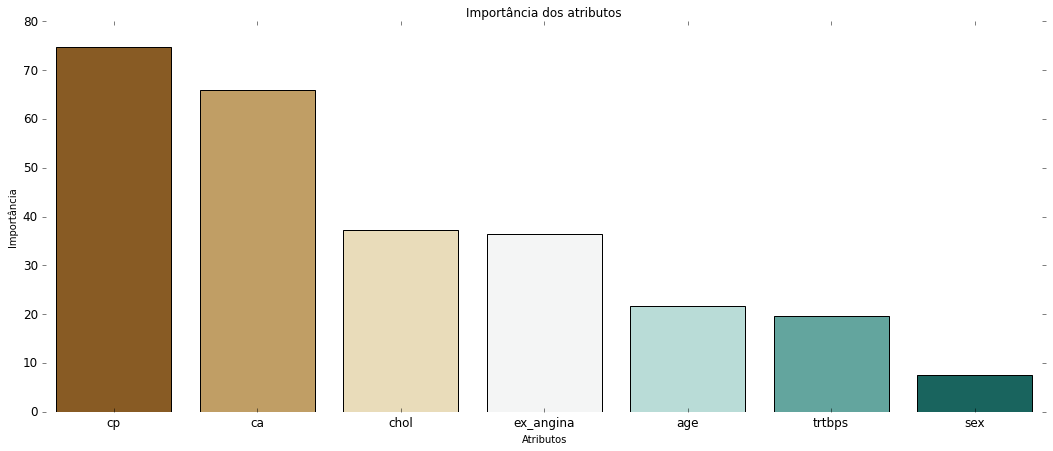

In [68]:
plt.figure(figsize=(18,7))
sns.barplot(x='Atributos', y='Scores', data=featureScores, palette='BrBG');
plt.box(on=None);
plt.xlabel('Atributos')
plt.ylabel('Importância');
plt.title('Importância dos atributos');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.show();

In [69]:
X_final_importance = X_final_scaled[['cp',
                                    'ca',
                                    'chol',
                                    'ex_angina',
                                    'age']]

X_final_importance = add_constant(X_final_importance)
X_final_importance.head()

,const,cp,ca,chol,ex_angina,age
0,1.0,1.000000,0.0,0.367698,0.0,0.708333
1,1.0,0.666667,0.0,0.426117,0.0,0.166667
2,1.0,0.333333,0.0,0.268041,0.0,0.250000
3,1.0,0.333333,0.0,0.378007,0.0,0.562500
4,1.0,0.000000,0.0,0.783505,1.0,0.583333


In [70]:
# Modelo V3

X = X_final_importance
y = y_final

logit_model_v3 = sm.Logit(y,X).fit()

print(logit_model_v3.summary())

Optimization terminated successfully.
         Current function value: 0.484084
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  326
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            5
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.3016
Time:                        14:27:02   Log-Likelihood:                -157.81
converged:                       True   LL-Null:                       -225.97
Covariance Type:            nonrobust   LLR p-value:                 1.089e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1439      0.529      2.162      0.031       0.107       2.181
cp             2.3333      0.

In [71]:
logit_model_v3.params

const        1.143872
cp           2.333346
ca          -3.269894
chol        -0.377482
ex_angina   -1.420818
age         -1.331698
dtype: float64

In [73]:
np.exp(logit_model_v3.params)

const         3.138899
cp           10.312388
ca            0.038010
chol          0.685586
ex_angina     0.241516
age           0.264028
dtype: float64

In [74]:
logit_model_v3.conf_int()

,0,1
const,0.107045,2.180700
cp,1.466543,3.200149
ca,-4.555569,-1.984220
chol,-2.056419,1.301455
ex_angina,-2.046564,-0.795071
age,-2.908284,0.244888


In [75]:
np.exp(logit_model_v3.conf_int())

,0,1
const,1.112984,8.852499
cp,4.334226,24.536181
ca,0.010509,0.137488
chol,0.127911,3.674639
ex_angina,0.129178,0.451549
age,0.054569,1.277478


In [76]:
logit_model_v3.pvalues

const        3.059385e-02
cp           1.320160e-07
ca           6.201473e-07
chol         6.594546e-01
ex_angina    8.575594e-06
age          9.781762e-02
dtype: float64

In [79]:
params = np.exp(logit_model_v3.params)
pvalue = round(logit_model_v3.pvalues, 3)

conf = np.exp(logit_model_v3.conf_int())
conf['OR'] = params
conf['p-value'] = pvalue

conf.columns = ['IC 95%(2.5%)', 'IC 95%(97.5%)', 'Odds Ratio', 'p-value']
print((conf))


           IC 95%(2.5%)  IC 95%(97.5%)  Odds Ratio  p-value
const          1.112984       8.852499    3.138899    0.031
cp             4.334226      24.536181   10.312388    0.000
ca             0.010509       0.137488    0.038010    0.000
chol           0.127911       3.674639    0.685586    0.659
ex_angina      0.129178       0.451549    0.241516    0.000
age            0.054569       1.277478    0.264028    0.098
